In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from collections import defaultdict,Counter
from wordcloud import WordCloud, STOPWORDS
from sklearn.cluster import KMeans
from gensim.models import word2vec
from sklearn.manifold import TSNE
import plotly
from plotly.subplots import make_subplots
from nltk.tokenize import word_tokenize
import plotly.figure_factory as ff
from nltk.corpus import stopwords
from nltk.corpus import stopwords
import plotly.graph_objects as go
from textblob import TextBlob
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from nltk.util import ngrams
import plotly.offline as py
import plotly.express as px
from statistics import *
from plotly import tools
import seaborn as sns
from tqdm import tqdm
import pandas as pd
import numpy as np
import textstat
import string
import json
import nltk
import gc
import re

Import the training dataset

In [2]:
data = pd.read_csv("articles_data.csv")
data.head()

,Unnamed: 0,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
0,0,reuters,Reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,https://www.reuters.com/article/us-tesla-crash...,https://s4.reutersmedia.net/resources/r/?m=02&...,2019-09-03T16:22:20Z,WASHINGTON (Reuters) - The National Transporta...,0.0,0.0,0.0,2528.0,0.0
1,1,the-irish-times,The Irish Times,Eoin Burke-Kennedy,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,https://www.irishtimes.com/business/economy/un...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T10:32:28Z,The States jobless rate fell to 5.2 per cent l...,0.0,6.0,10.0,2.0,0.0
2,2,the-irish-times,The Irish Times,Deirdre McQuillan,"Louise Kennedy AW2019: Long coats, sparkling t...",Autumn-winter collection features designer’s g...,https://www.irishtimes.com/\t\t\t\t\t\t\t/life...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T14:40:00Z,Louise Kennedy is showing off her autumn-winte...,1.0,NaN,NaN,NaN,NaN
3,3,al-jazeera-english,Al Jazeera English,Al Jazeera,North Korean footballer Han joins Italian gian...,Han is the first North Korean player in the Se...,https://www.aljazeera.com/news/2019/09/north-k...,https://www.aljazeera.com/mritems/Images/2019/...,2019-09-03T17:25:39Z,"Han Kwang Song, the first North Korean footbal...",0.0,0.0,0.0,7.0,0.0
4,4,bbc-news,BBC News,BBC News,UK government lawyer says proroguing parliamen...,"The UK government's lawyer, David Johnston arg...",https://www.bbc.co.uk/news/av/uk-scotland-4956...,https://ichef.bbci.co.uk/news/1024/branded_new...,2019-09-03T14:39:21Z,NaN,0.0,0.0,0.0,0.0,0.0


WordCloud

Text(0.5, 1.0, 'description')

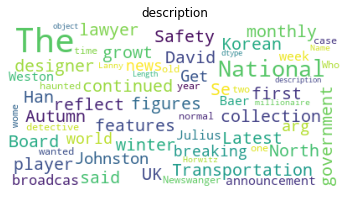

In [3]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
    background_color = 'white',
    stopwords =stopwords,
    max_words = 200,
    max_font_size = 40,
    random_state = 42).generate(str(data['description']))

plt.imshow(wordcloud)
plt.axis('off')
plt.title('description')

Text(0.5, 1.0, 'content')

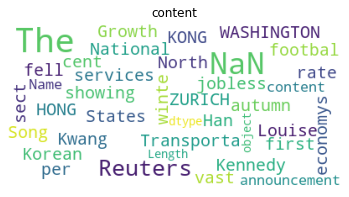

In [4]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
    background_color = 'white',
    stopwords =stopwords,
    max_words = 200,
    max_font_size = 40,
    random_state = 42).generate(str(data['content']))

plt.imshow(wordcloud)
plt.axis('off')
plt.title('content')

In [ ]:
Data Cleaning

In [5]:
def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    return s


data['description'] = [cleaning(s) for s in data['description']]
data['content'] = [cleaning(s) for s in data['content']]

Tf-idf and Kmeans

In [6]:
vectorizer = TfidfVectorizer(stop_words = 'english', use_idf = True)
model = vectorizer.fit_transform(data['description'].str.upper())

km = KMeans(n_clusters=5, init='k-means++', max_iter=200, n_init=1)
#km = KMeans(n_cluster = 5, init = 'k-means++', max_iter = 200, n_init = 1)

km = km.fit(model)
terms = vectorizer.get_feature_names()

order_centroids = km.cluster_centers_.argsort()[:,::-1]

#order_centroids = km.cluster_cluster_.argsort()[:,::-1]

for i in range(5):
    print("cluster of words %d:" %i)
    for ind in order_centroids[i,:10]:
        print(' %s' % terms[ind])
    print() 

cluster of words 0:
 new
 said
 world
 people
 latest
 news
 bbc
 service
 thursday
 week

cluster of words 1:
 president
 trump
 donald
 minister
 prime
 house
 johnson
 said
 boris
 impeachment

cluster of words 2:
 year
 old
 said
 new
 man
 million
 police
 years
 month
 died

cluster of words 3:
 says
 minister
 eu
 new
 pm
 deal
 leader
 group
 uk
 president

cluster of words 4:
 news
 interviews
 abc
 broadcast
 exclusive
 breaking
 verage
 online
 video
 national



Building Corpus

In [8]:
def build_corpus(data):
    corpus = []
    for col in['content', 'description']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
            
    return corpus

corpus = build_corpus(data)
corpus[0:1]

[['washington',
  'reuters',
  'the',
  'national',
  'transportation',
  'safety',
  'board',
  'said',
  'tuesday',
  'a',
  'tesla',
  'model',
  's',
  'was',
  'in',
  'autopilot',
  'mode',
  'when',
  'it',
  'struck',
  'a',
  'fire',
  'truck',
  'in',
  'culver',
  'city',
  'california',
  'one',
  'of',
  'a',
  'series',
  'of',
  'crashes',
  'the',
  'board',
  'is',
  'investigating',
  'involving',
  'tesla',
  's',
  'driver',
  'assistance',
  'chars',
  '']]

Words to Vector

In [9]:
model = word2vec.Word2Vec(corpus, size = 100, window = 20, min_count = 400, workers = 4)
model.wv['states']

array([ 0.551877  ,  0.18198287,  0.10907319, -0.9311816 ,  0.10772401,
        0.02287758, -0.8550011 , -1.3231465 ,  0.37054467,  1.141992  ,
       -0.3082407 ,  0.2452958 , -1.4192328 , -1.4721721 , -0.24336216,
        0.6157499 , -0.6301037 ,  0.45521188, -0.42482546,  0.58866   ,
       -0.6271505 ,  0.4365043 ,  0.41306764, -0.01292153, -0.49929428,
       -0.9346548 , -1.4881727 , -0.8873157 ,  0.27371448, -0.334893  ,
        0.85845375, -0.85745895, -0.4587443 ,  0.26319805, -0.98622155,
        0.2546825 ,  0.49181524,  0.28260753,  0.35663018, -0.7708047 ,
       -1.9039748 ,  0.308743  ,  0.29553172, -0.15231898,  0.44056678,
        1.1782131 ,  0.49743024, -0.8552616 ,  1.4802885 ,  0.51915705,
       -0.4792529 ,  1.1250069 ,  0.6406412 ,  0.5898305 ,  0.9116274 ,
       -0.91655344,  1.016786  , -0.20268714, -0.04532505,  1.3176626 ,
       -0.8570325 ,  0.75715023,  0.14248812, -0.79820645,  0.4239019 ,
       -0.99420965, -0.13550925,  0.5706761 ,  0.46231508, -0.59

Data Visualization

In [10]:
def tsne_plot(model):
    labels = []
    tokens =[]
    
    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
        
        
    tsne_model = TSNE(perplexity = 40,
                     n_components = 2, init = 'pca',
                     n_iter = 2500, random_state = 23)
    
    new_values = tsne_model.fit_transform(tokens)
    
    x = []
    y = []
    
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
        
        
    plt.figure(figsize = (16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                    xy = (x[i], y[i]),
                    xytext = (5, 2),
                    textcoords = 'offset points',
                    ha = 'right',
                    va = 'bottom')
        
    plt.show()   

/home/chi/anaconda3/envs/nltkENv/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



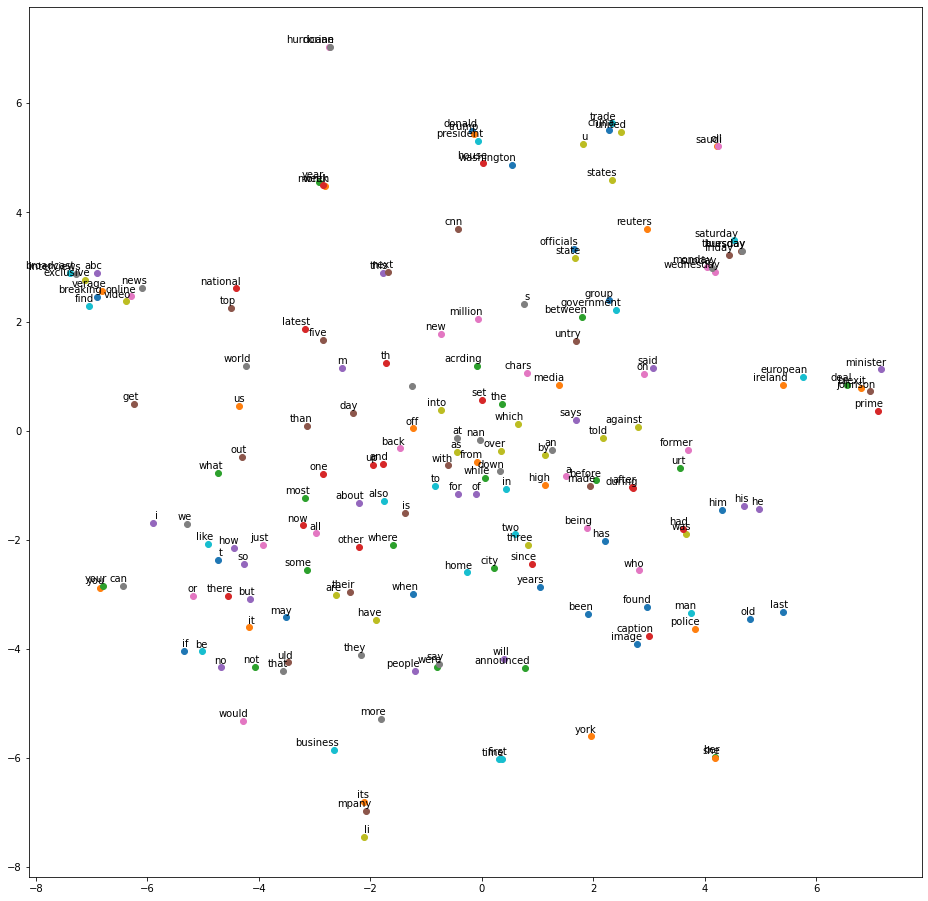

In [11]:
tsne_plot(model)